In [ ]:
import tensorflow as tf
from math import pi
!git clone 'https://github.com/LuchnikovI/transformer-as-NNQS'
%cd 'transformer-as-NNQS'
from transformer import attention_model
from ar_wave_function import AutoregressiveWaveFunction as Psi
from tqdm import tqdm
import matplotlib.pyplot as plt

In [10]:
#----------------------------Parameters----------------------------#
n = 32  # total number of spins
separation = (8, 4)  # shows how we split a sustem into subsystems
iters = 5000  # total number of iterations
lr_in = 0.001  # initial learning rate
lr_out = 0.0001  # final learning rate
number_of_samples = 1024  # number of samples per iteration
heads_number = 8  # number of attention heads
number_of_layers = 2  # number of layers
embedding_dim = 16
#-------------------------------------------------------------------#

#---------------------------Hamiltonian-----------------------------#
# zz pauli strings
zz = 3 * (tf.eye(n, dtype=tf.int32) +\
          tf.roll(tf.eye(n, dtype=tf.int32), shift=1, axis=-1))
zz = zz[:-1]
# x pauli strings
x = tf.eye(n, dtype=tf.int32)
# all pauli strings
H = tf.concat([x, zz], axis=0)
# amplitudes of pauli strings
ampl = tf.ones((2 * n - 1,), dtype=tf.complex64)
# representation of a Hamiltonian
h = [H, ampl]
#-------------------------------------------------------------------#

# optimizer
decay_coeff = (lr_out / lr_in) ** (1 / iters)
sch = tf.optimizers.schedules.ExponentialDecay(lr_in, iters, decay_coeff)
opt = tf.optimizers.Adam(sch)

# keras ar model
model = attention_model(2 ** separation[1],
                        embedding_dim,
                        heads_number,
                        number_of_layers,
                        separation[0] + 1)

# ar based wave function
psi = Psi(model)

E_list = []  # will be filled by intermediate values of energy
E_av = tf.constant(0.)  # initial average energy (baseline)

# training loop
for i in tqdm(range(iters)):
    samples = psi.sample(number_of_samples, separation[0])
    gradient, E = psi.grad(h, samples, separation, E_av)
    E_av = E_av * 0.99 + E * 0.01
    opt.apply_gradients(zip(gradient, psi.model.weights))
    E_list.append(E_av / n)
    if i % 200 == 1:
        print(E_av)

  0%|          | 2/5000 [00:02<1:48:39,  1.30s/it]

tf.Tensor(0.038345575, shape=(), dtype=float32)


  4%|▍         | 202/5000 [00:55<21:32,  3.71it/s]

tf.Tensor(-32.300785, shape=(), dtype=float32)


  8%|▊         | 402/5000 [01:50<20:50,  3.68it/s]

tf.Tensor(-38.533073, shape=(), dtype=float32)


 12%|█▏        | 602/5000 [02:45<20:14,  3.62it/s]

tf.Tensor(-39.53458, shape=(), dtype=float32)


 16%|█▌        | 802/5000 [03:40<19:24,  3.61it/s]

tf.Tensor(-39.801785, shape=(), dtype=float32)


 20%|██        | 1002/5000 [04:35<18:38,  3.58it/s]

tf.Tensor(-39.899605, shape=(), dtype=float32)


 24%|██▍       | 1202/5000 [05:32<18:01,  3.51it/s]

tf.Tensor(-39.997387, shape=(), dtype=float32)


 28%|██▊       | 1402/5000 [06:28<16:55,  3.54it/s]

tf.Tensor(-40.0766, shape=(), dtype=float32)


 32%|███▏      | 1602/5000 [07:24<16:05,  3.52it/s]

tf.Tensor(-40.108395, shape=(), dtype=float32)


 36%|███▌      | 1802/5000 [08:20<15:02,  3.54it/s]

tf.Tensor(-40.17825, shape=(), dtype=float32)


 40%|████      | 2002/5000 [09:17<14:01,  3.56it/s]

tf.Tensor(-40.20743, shape=(), dtype=float32)


 44%|████▍     | 2202/5000 [10:13<12:55,  3.61it/s]

tf.Tensor(-40.25084, shape=(), dtype=float32)


 48%|████▊     | 2402/5000 [11:09<12:07,  3.57it/s]

tf.Tensor(-40.2635, shape=(), dtype=float32)


 52%|█████▏    | 2602/5000 [12:05<11:28,  3.48it/s]

tf.Tensor(-40.27122, shape=(), dtype=float32)


 56%|█████▌    | 2802/5000 [13:01<10:17,  3.56it/s]

tf.Tensor(-40.28867, shape=(), dtype=float32)


 60%|██████    | 3002/5000 [13:57<09:20,  3.56it/s]

tf.Tensor(-40.295204, shape=(), dtype=float32)


 64%|██████▍   | 3202/5000 [14:53<08:20,  3.59it/s]

tf.Tensor(-40.29696, shape=(), dtype=float32)


 68%|██████▊   | 3402/5000 [15:49<07:27,  3.57it/s]

tf.Tensor(-40.30972, shape=(), dtype=float32)


 72%|███████▏  | 3602/5000 [16:45<06:32,  3.56it/s]

tf.Tensor(-40.297955, shape=(), dtype=float32)


 76%|███████▌  | 3802/5000 [17:41<05:37,  3.55it/s]

tf.Tensor(-40.315002, shape=(), dtype=float32)


 80%|████████  | 4002/5000 [18:37<04:38,  3.59it/s]

tf.Tensor(-40.31351, shape=(), dtype=float32)


 84%|████████▍ | 4202/5000 [19:33<03:43,  3.58it/s]

tf.Tensor(-40.319046, shape=(), dtype=float32)


 88%|████████▊ | 4402/5000 [20:29<02:48,  3.54it/s]

tf.Tensor(-40.32573, shape=(), dtype=float32)


 92%|█████████▏| 4602/5000 [21:26<01:53,  3.51it/s]

tf.Tensor(-40.327015, shape=(), dtype=float32)


 96%|█████████▌| 4802/5000 [22:22<00:56,  3.52it/s]

tf.Tensor(-40.330853, shape=(), dtype=float32)


100%|██████████| 5000/5000 [23:18<00:00,  3.58it/s]


tf.Tensor(-1.2601753, shape=(), dtype=float32)


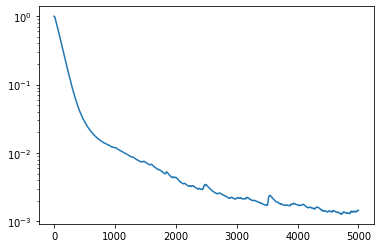

In [12]:
# plotting E vs iter
dmrgE = -1.2620097862880841  # dmgr based gs energy
plt.plot((tf.convert_to_tensor(E_list) - dmrgE) / tf.abs(dmrgE))
plt.yscale('log')
print(E_list[-1])

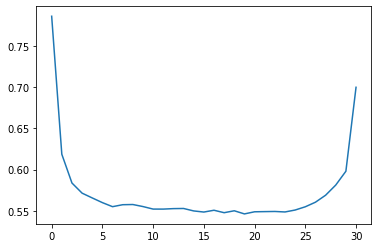

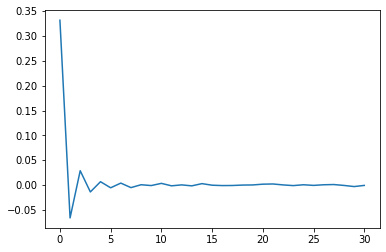

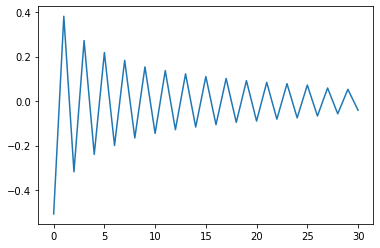

In [13]:
# Plotting corr. functions

#----------------Parameters--------------#
num_of_samples = 1024
num_of_iter = 1000
#----------------------------------------#

# pauli strings
pauli_string = tf.eye(n, dtype=tf.int32)[1:]
pauli_string = tf.concat([tf.ones((n-1, 1), dtype=tf.int32),
                          pauli_string[:, 1:]], axis=1)
pauli_string = tf.concat([pauli_string,
                          2 * pauli_string,
                          3 * pauli_string], axis=0)
ampl = tf.ones((tf.shape(pauli_string)[0],))

corr_func = tf.zeros((tf.shape(pauli_string)[0],))
for _ in range(num_of_iter):
    samples = psi.sample(num_of_samples, separation[0])
    corr_func = corr_func + psi.observables_average([pauli_string, ampl], samples, separation)[0]
corr_func = corr_func / num_of_iter
corr_func = tf.reshape(corr_func, (3, -1))
plt.figure()
plt.plot(corr_func[0])
plt.figure()
plt.plot(corr_func[1])
plt.figure()
plt.plot(corr_func[2])